In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
(x_data,y_data),(t_x_data,t_y_data) = load_data()
x_data.shape

(60000, 28, 28)

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
(x_data,y_data),(t_x_data,t_y_data) = load_data()
x_data=x_data.reshape(-1,28,28,1)/255.0
t_x,tt_x,t_y,tt_y = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [3]:
m=keras.Sequential()
m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'#32장의 이미지
                          ,input_shape=(28,28,1)))
m.add(keras.layers.MaxPooling2D(2)) #차원축소,이미지에서 풀링작업하면 이미지이동에 둔감해진다.
m.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(keras.layers.MaxPooling2D(2)) #맥스풀링/평균 풀링

In [4]:
#가중치의 특징을 가지고있는 뉴런
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.4))
m.add(keras.layers.Dense(10,activation='softmax'))
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

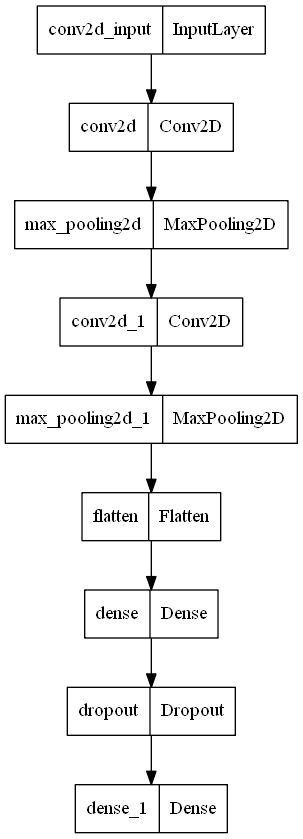

In [5]:
keras.utils.plot_model(m)

In [7]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

In [11]:
ck_p=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
e_stopping= keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=m.fit(t_x,t_y,epochs=20,validation_data=(tt_x,tt_y),callbacks=[ck_p,e_stopping])

Epoch 1/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5385 - accuracy: 0.8073 - val_loss: 0.3411 - val_accuracy: 0.8733
Epoch 2/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3566 - accuracy: 0.8728 - val_loss: 0.2786 - val_accuracy: 0.8950
Epoch 3/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.3035 - accuracy: 0.8904 - val_loss: 0.2595 - val_accuracy: 0.9027
Epoch 4/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2729 - accuracy: 0.9011 - val_loss: 0.2391 - val_accuracy: 0.9112
Epoch 5/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2451 - accuracy: 0.9112 - val_loss: 0.2494 - val_accuracy: 0.9082
Epoch 6/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2268 - accuracy: 0.9163 - val_loss: 0.2234 - val_accuracy: 0.9172
Epoch 7/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2115 - accuracy: 0.9222 - val_loss: 0.2174 -

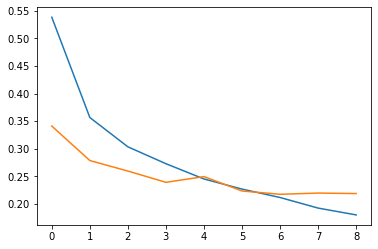

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [21]:
m2=keras.models.load_model('best-cnn-model.h5')
m.evaluate(tt_x,tt_y)

375/375 [==============================] - 2s 5ms/step - loss: 0.2174 - accuracy: 0.9221


[0.21740148961544037, 0.92208331823349]

In [22]:
m2.evaluate(tt_x,tt_y)

375/375 [==============================] - 2s 5ms/step - loss: 0.2174 - accuracy: 0.9221


[0.21740148961544037, 0.92208331823349]

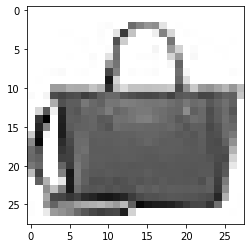

In [14]:
plt.imshow(tt_x[0].reshape(28,28),cmap='gray_r')
plt.show()

In [16]:
ck_data=m.predict(tt_x[0:1])
ck_data

array([[2.4953233e-13, 1.5463866e-22, 3.4826935e-16, 1.2512136e-14,
        1.3681427e-14, 4.9515347e-14, 7.5126103e-14, 4.2307809e-15,
        1.0000000e+00, 1.9333017e-15]], dtype=float32)

<BarContainer object of 10 artists>

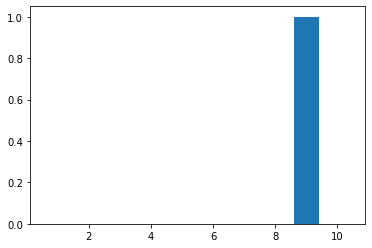

In [17]:
plt.bar(range(1,11),ck_data[0])

In [23]:
tt_y[0]#값이 위치하는 장소

8

In [24]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
classes[np.argmax(ck_data)]

'가방'

In [25]:
ck_data1=t_x_data.reshape(-1,28,28,1)/255.0
m.evaluate(ck_data1,t_y_data)

313/313 [==============================] - 2s 6ms/step - loss: 0.2374 - accuracy: 0.9150


[0.2374257743358612, 0.9150000214576721]

In [29]:
y_l=m.predict(ck_data1[0:10])


array([[3.17681481e-09, 3.98475654e-12, 1.08117383e-10, 9.84422432e-10,
        1.79840351e-10, 5.67811139e-06, 2.21418595e-09, 4.73031629e-04,
        9.32420030e-10, 9.99521255e-01],
       [1.01533949e-07, 1.57084733e-14, 9.99998331e-01, 1.69786182e-11,
        4.15880464e-07, 8.65122262e-17, 1.23078621e-06, 1.17418191e-20,
        1.95128462e-11, 6.12231196e-18],
       [1.11042217e-11, 1.00000000e+00, 1.52617903e-12, 1.62732527e-09,
        2.59603672e-10, 6.00544666e-16, 3.81280736e-11, 4.28148473e-15,
        1.74774732e-13, 8.77567943e-14],
       [8.05284726e-14, 1.00000000e+00, 1.49360437e-14, 1.20368160e-11,
        1.69335622e-11, 2.72803054e-19, 9.20176804e-13, 3.83167353e-19,
        3.99040027e-16, 8.85743842e-18],
       [1.34147972e-01, 5.73023669e-07, 2.07889192e-02, 6.50765665e-04,
        3.08173546e-03, 4.41060024e-08, 8.41139257e-01, 1.59476521e-08,
        1.90049963e-04, 6.19950981e-07],
       [2.05904338e-09, 9.99999881e-01, 3.09928333e-10, 1.35418134e-07,
   

In [30]:
classes[np.argmax(y_l[1:2])]

'스웨터'

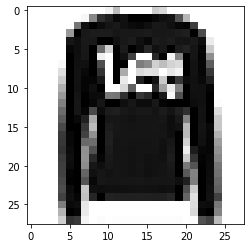

In [31]:
plt.imshow(ck_data1[1].reshape(28,28),cmap='gray_r')
plt.show()

In [32]:
len(y_l)

10

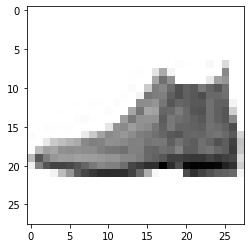

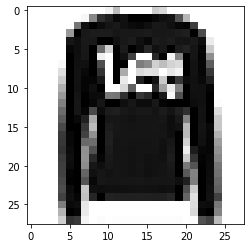

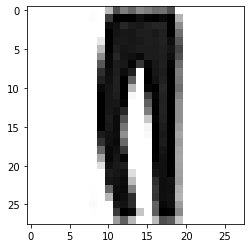

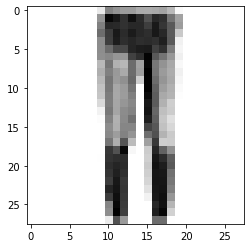

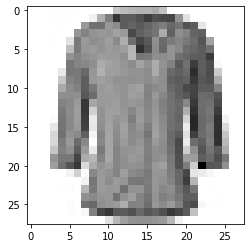

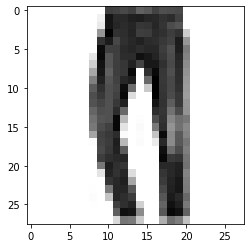

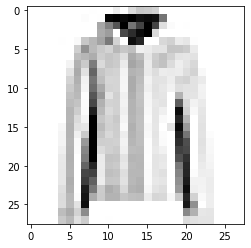

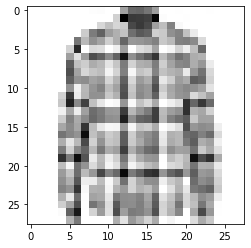

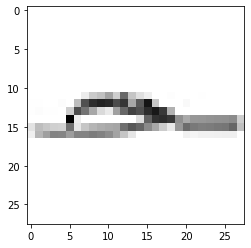

In [34]:
for i in range(len(y_l)-1):
    classes[np.argmax(y_l[i,i+1])]
    plt.imshow(ck_data1[i].reshape(28,28),cmap='gray_r')
    plt.show()